In [1]:
import pandas as pd
import pandas_datareader

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pg = data.DataReader('MSFT', data_source='yahoo',start='1995-1-1')

In [4]:
pg.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,3.843750,3.757812,3.843750,3.761719,39545600.0,2.729909
1995-01-04,3.796875,3.718750,3.765625,3.789062,51611200.0,2.749754
1995-01-05,3.812500,3.710938,3.804688,3.726562,39824000.0,2.704397
1995-01-06,3.828125,3.734375,3.742188,3.789062,46681600.0,2.749754
1995-01-09,3.812500,3.734375,3.804688,3.765625,46000000.0,2.732745


#### Simple return 

In [6]:
pg['simple_return'] = (pg['Adj Close']/pg['Adj Close'].shift(1))-1

In [7]:
pg.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,3.843750,3.757812,3.843750,3.761719,39545600.0,2.729909,NaN
1995-01-04,3.796875,3.718750,3.765625,3.789062,51611200.0,2.749754,0.007269
1995-01-05,3.812500,3.710938,3.804688,3.726562,39824000.0,2.704397,-0.016495
1995-01-06,3.828125,3.734375,3.742188,3.789062,46681600.0,2.749754,0.016771
1995-01-09,3.812500,3.734375,3.804688,3.765625,46000000.0,2.732745,-0.006186


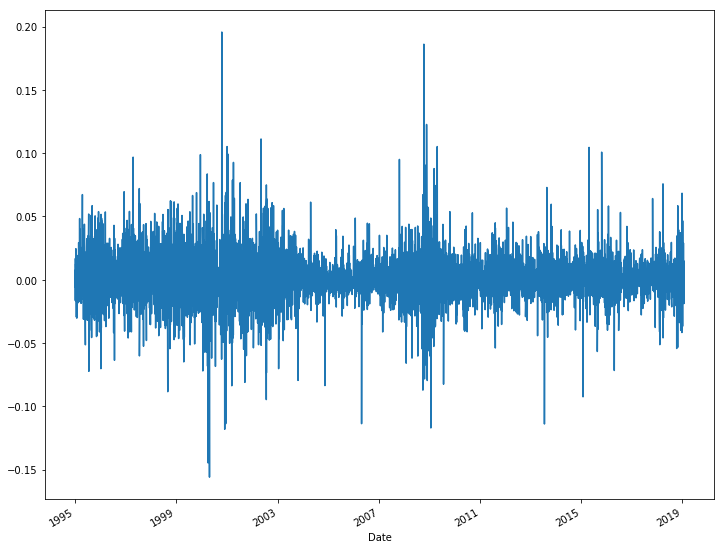

In [8]:
pg['simple_return'].plot(figsize=(12,10))

In [2]:
average_return = pg['simple_return'].mean()

NameError: name 'pg' is not defined

In [1]:
average_return

NameError: name 'average_return' is not defined

In [12]:
average_return = average_return * 250
average_return

0.20081562555658802

In [13]:
round(average_return,4)*100

20.080000000000002

#### Logreturns

In [14]:
import numpy as np
pg['logreturn'] = np.log(pg['Adj Close']/pg['Adj Close'].shift(1))

In [15]:
pg.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return,logreturn
Date,,,,,,,,
1995-01-03,3.843750,3.757812,3.843750,3.761719,39545600.0,2.729909,NaN,NaN
1995-01-04,3.796875,3.718750,3.765625,3.789062,51611200.0,2.749754,0.007269,0.007243
1995-01-05,3.812500,3.710938,3.804688,3.726562,39824000.0,2.704397,-0.016495,-0.016632
1995-01-06,3.828125,3.734375,3.742188,3.789062,46681600.0,2.749754,0.016771,0.016632
1995-01-09,3.812500,3.734375,3.804688,3.765625,46000000.0,2.732745,-0.006186,-0.006205


In [16]:
average_return_log = pg['logreturn'].mean() * 250 * 100
average_return_log

15.133118082151809

### return of portfolio of security

In [17]:
player = ['PG','MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for individual in player:
    mydata[individual] = data.DataReader(individual, data_source='yahoo',start='1995-1-1')['Adj Close']

In [18]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6057 entries, 1995-01-03 to 2019-01-23
Data columns (total 4 columns):
PG      6057 non-null float64
MSFT    6057 non-null float64
F       6057 non-null float64
GE      6057 non-null float64
dtypes: float64(4)
memory usage: 236.6 KB


In [19]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.528558,2.729909,3.531971,2.975797
1995-01-04,6.476228,2.749754,3.626998,2.975797
1995-01-05,6.384644,2.704397,3.595320,2.983092
1995-01-06,6.397724,2.749754,3.595320,2.968507
1995-01-09,6.371559,2.732745,3.658676,2.939330


In [20]:
mydata.iloc[0]

PG      6.528558
MSFT    2.729909
F       3.531971
GE      2.975797
Name: 1995-01-03 00:00:00, dtype: float64

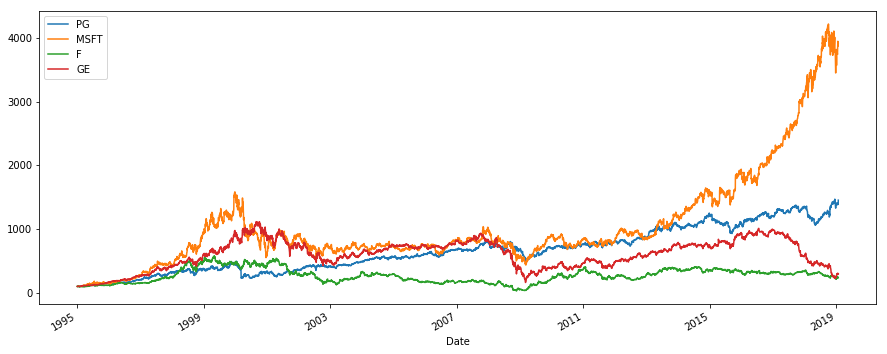

In [21]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6))

In [22]:
weight = np.array([0.25,0.25,0.25,0.25])

In [23]:
returns = (mydata/mydata.shift(1)) - 1 

In [24]:
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004889
1995-01-09,-0.004090,-0.006186,0.017622,-0.009829


In [25]:
averagereturns = returns.mean()*250
averagereturns

PG      0.135555
MSFT    0.200816
F       0.113824
GE      0.088739
dtype: float64

In [26]:
type(averagereturns)

pandas.core.series.Series

In [27]:
np.dot(averagereturns,weight)

0.13473330201468378

In [28]:
# Assigning different weight
weight2 = np.array([0.40,0.40,0.10,0.10])

In [29]:
np.dot(averagereturns,weight2)*100

15.48046173674266

### Calculating return of index

In [30]:
stockindex = ['^GSPC', '^IXIC','^GDAXI']

In [31]:
indexdata = pd.DataFrame()
for i in stockindex:
    indexdata[i] = data.DataReader(i, data_source='yahoo',start='1999-01-04')['Adj Close']
    

In [32]:
indexdata.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1999-01-04,1228.099976,2208.050049,5290.359863
1999-01-05,1244.780029,2251.270020,5263.410156
1999-01-06,1272.339966,2320.860107,5442.899902
1999-01-07,1269.729980,2326.090088,5345.709961
1999-01-08,1275.089966,2344.409912,5370.509766


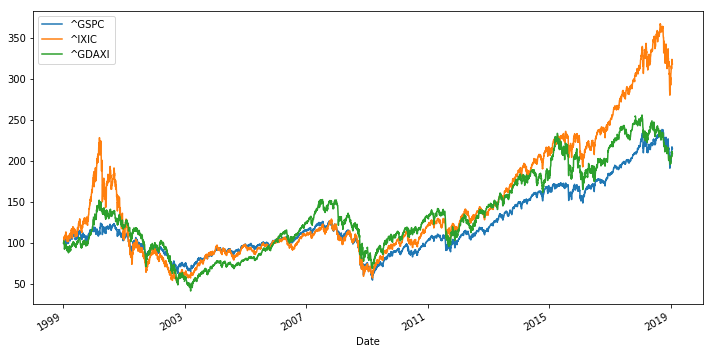

In [33]:
(indexdata/indexdata.iloc[0]*100).plot(figsize=(12,6))

In [34]:
indexdatareturn  = (indexdata/indexdata.shift(1)-1)
indexdatareturn.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2019-01-16,0.002222,0.001546,0.003622
2019-01-17,0.007591,0.007075,-0.001155
2019-01-18,0.013183,0.010272,0.026278
2019-01-22,-0.014157,-0.019123,-0.010301
2019-01-23,0.002203,0.000770,-0.001674


In [35]:
anualdatareturn = indexdatareturn.mean()*250

In [36]:
anualdatareturn.head()

^GSPC     0.056013
^IXIC     0.089099
^GDAXI    0.052531
dtype: float64

In [37]:
indexdata2 = ['MSFT','^GSPC','^DJI']
indexdat2 = pd.DataFrame()
for i in indexdata2:
    indexdat2[i] = data.DataReader(i, data_source='yahoo',start='2007-01-01')['Adj Close']

In [38]:
indexdat2.head()

,MSFT,^GSPC,^DJI
Date,,,
2007-01-03,22.574831,1416.599976,12474.519531
2007-01-04,22.537027,1418.339966,12480.690430
2007-01-05,22.408501,1409.709961,12398.009766
2007-01-08,22.627748,1412.839966,12423.490234
2007-01-09,22.650431,1412.109985,12416.599609


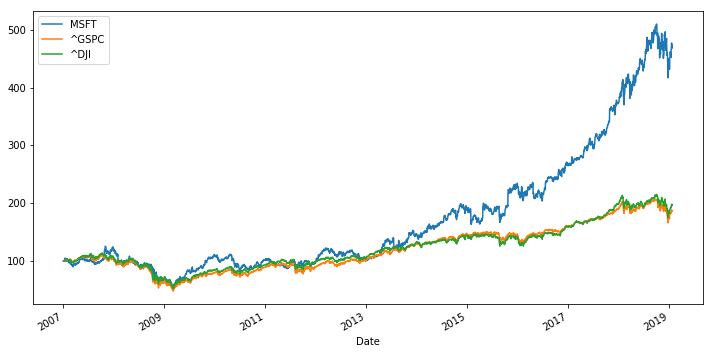

In [39]:
(indexdat2/indexdat2.iloc[0]*100).plot(figsize=(12,6))

##### Calculating the risk of security

In [40]:
company = ['MSFT','AAPL']
secdata = pd.DataFrame()
for i in company:
    secdata[i] = data.DataReader(i, data_source='yahoo',start='2008-01-11')['Adj Close']

In [41]:
secdata.head()

,MSFT,AAPL
Date,,
2008-01-10,26.306889,17.030483
2008-01-11,25.985041,16.520582
2008-01-14,26.352856,17.103188
2008-01-15,26.054005,16.171404
2008-01-16,25.463963,15.272138


In [42]:
import numpy as np
secreturn =  np.log(secdata/secdata.shift(1))

In [43]:
secreturn.head()

,MSFT,AAPL
Date,,
2008-01-10,NaN,NaN
2008-01-11,-0.012310,-0.030398
2008-01-14,0.014056,0.034658
2008-01-15,-0.011405,-0.056020
2008-01-16,-0.022907,-0.057214


In [44]:
secreturn['MSFT'].std()*250**0.5

0.2764574993731382

In [45]:
secreturn['AAPL'].std()*250**0.5

0.31061770682534895

### Calculating portfolio risk

In [46]:
## Equal weight
weight = np.array([0.5,0.5])


In [47]:
## Expected return
pfolioreturn = np.dot( secreturn,weight.T)*250
pfolioreturn.mean()

nan

In [48]:
# Portfolio variance
pfolio = np.dot(weight.T, np.dot(secreturn.cov()*250,weight))
pfolio

0.06434001352368086

In [49]:
# Portfolio variability
pfoliovar = np.dot(weight.T, np.dot(secreturn.cov()*250,weight))**0.5
pfoliovar

0.25365333335811074

#### Effecient frontier

In [50]:
assets = ['MSFT','^GSPC']
pfdata = pd.DataFrame()

In [51]:
for i in assets:
    pfdata[i] = data.DataReader(i,data_source='yahoo',start='2014-01-01')['Adj Close']

In [52]:
pfdata.tail()

,MSFT,^GSPC
Date,,
2019-01-16,105.379997,2616.100098
2019-01-17,106.120003,2635.959961
2019-01-18,107.709999,2670.709961
2019-01-22,105.680000,2632.899902
2019-01-23,106.709999,2638.699951


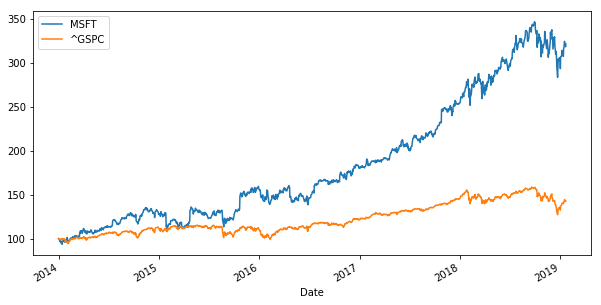

In [53]:
(pfdata/pfdata.iloc[0]*100).plot(figsize=(10,5))

In [54]:
import numpy as np
logreturn = np.log(pfdata/pfdata.shift(1))

In [55]:
logreturn.corr()

,MSFT,^GSPC
MSFT,1.000000,0.731246
^GSPC,0.731246,1.000000


In [56]:
weight = np.random.random(2)
weight /= np.sum(weight)
weight


array([0.89748922, 0.10251078])

In [57]:
#### Expected portfolio return
import numpy as np
np.sum(weight * logreturn.mean()) * 250

0.21309698131571553

In [58]:
##### Expected portfolio variance
np.dot(weight.T, np.dot(logreturn.cov()*250,weight))

0.04732921919921714

In [59]:
pfolioreturn = []
pfoliovolatile = []

for i in range(1000):
    weight = np.random.random(2)
    weight /= np.sum(weight)
    pfolioreturn.append(np.sum(weight * logreturn.mean()) * 250)
    pfoliovolatile.append(np.sqrt(np.dot(weight.T, np.dot(logreturn.cov()*250,weight))))
    
pfolioreturn = np.array(pfolioreturn)
pfoliovolatile = np.array(pfoliovolatile)

In [60]:
pfolio = pd.DataFrame({'Return':pfolioreturn,'Volatility':pfoliovolatile})

In [61]:
pfolio.head()

,Return,Volatility
0,0.090109,0.139045
1,0.147007,0.168596
2,0.158225,0.176072
3,0.136890,0.162241
4,0.072878,0.133759


Text(0,0.5,'return')

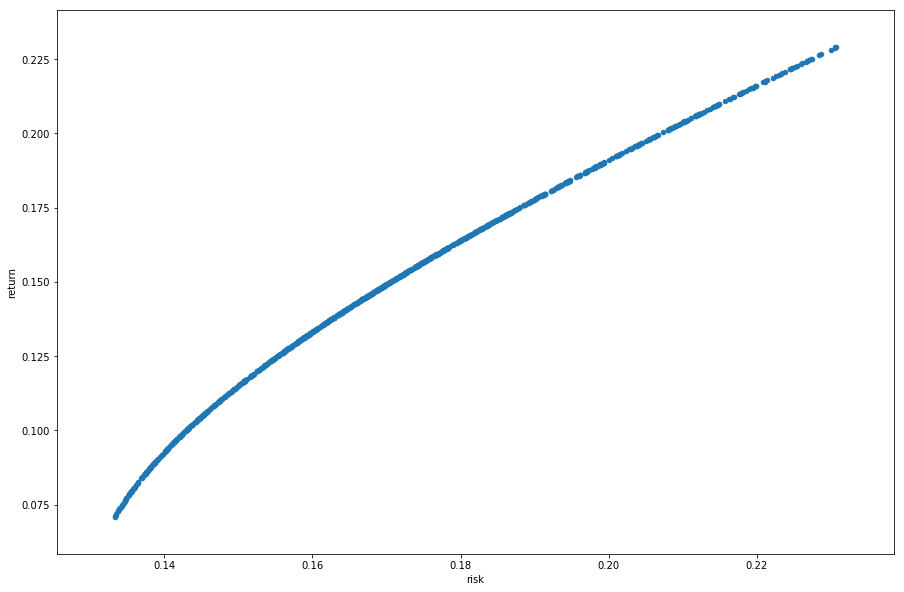

In [62]:
pfolio.plot(x='Volatility', y='Return',kind='scatter',figsize=(15,10))
plt.xlabel('risk')
plt.ylabel('return')

### Calculating the beta stocks

In [63]:
pfdata.head()

,MSFT,^GSPC
Date,,
2013-12-31,33.173367,1848.359985
2014-01-02,32.951675,1831.979980
2014-01-03,32.729988,1831.369995
2014-01-06,32.038334,1826.770020
2014-01-07,32.286613,1837.880005


In [64]:
cov = pfdata.cov()*250

In [65]:
cov

,MSFT,^GSPC
MSFT,1.388019e+05,1.774458e+06
^GSPC,1.774458e+06,2.447762e+07


In [66]:
marketvariance = pfdata['^GSPC'].var()*250
marketvariance

24477623.82772951

In [67]:
covmarket = cov.iloc[0,1]
covmarket

1774458.1322782417

In [68]:
betaofpg =  covmarket/marketvariance

In [69]:
betaofpg

0.07249307141766123

#### Expected retrun (CAPM)

In [70]:
pgexpret = 0.025 + betaofpg*0.25

In [71]:
pgexpret

0.04312326785441531

In [72]:
import statsmodels.api as sm

In [73]:
df = sm.datasets.macrodata.load_pandas().data

In [74]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [75]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju